In [1]:
import os
from pathlib import Path
import numpy as np
import math
import random
import torch
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import dataset_fasdd

In [2]:
# VALIDATION DATASET
val_transform = A.Compose([
    A.Resize(224, 224, p=1),
    ToTensorV2(p=1),
    ]
)

test_ds = dataset_fasdd.FASDDDataset(
    img_h = 224, 
    img_w = 224, 
    imgs_dir = '../../../datasets/fasdd/fasdd_uav/images/', 
    labels_file = '../../../datasets/fasdd/fasdd_uav/annotations/YOLO_UAV/test.txt', 
    num_classes = 2,
    ds_len = None,
    transform=val_transform, 
    target_transform=None    
)

DFire Removed wrong images: 0
DFire empty images: 1997
DFire only smoke images: 846
DFire only fire images: 35
DFire smoke and fire images: 1303


In [3]:
print(len(test_ds))

4181


tensor([1., 1.])
torch.Size([3, 224, 224])


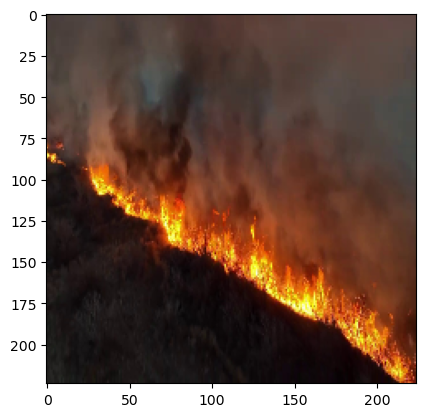

In [4]:
img, label = test_ds.__getitem__(70)
print(label)
print(img.shape)
plt.imshow(img.permute(1, 2, 0))

In [5]:
# LOADERS
val_loader = DataLoader(dataset=test_ds,
                        batch_size=64,
                        num_workers=1,
                        pin_memory=True,
                        shuffle=True,
                        drop_last=True)

In [1]:
def plot_pictures(loader):
    for batch_idx, (imgs, labels) in enumerate(loader):
        plt.subplots(16, 4, figsize=(16, 64))
        for i in range(64):
            plt.subplot(16, 4, i+1)
            label = labels[i].numpy()
            if label[0] + label[1] == 2:
                plt.title("Smoke and Fire")
            elif label[0] + label[1] == 0:
                plt.title("Empty")
            elif label[0] == 1:
                plt.title("Smoke")
            elif label[1] == 1:
                plt.title("Fire")
            else:
                print("Wrong Label")
            plt.imshow(imgs[i].permute(1, 2, 0))
        plt.tight_layout()
        break

In [ ]:
plot_pictures(val_loader)